### Decision Tree Methods - In class practice

In [ ]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

2. Import the bank dataset

In [2]:
bank = pd.read_csv('Datasets/Bank.csv')

In [3]:
bank.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

3. The dependent variable is 'Personal Loan', meaning whether the customer accepts a personal loan offer or not. Take a look at its distribution.

([<matplotlib.axis.XTick at 0x141f15f40>,
 [Text(0, 0, 'No loan'), Text(1, 0, 'Loan Accepted')])

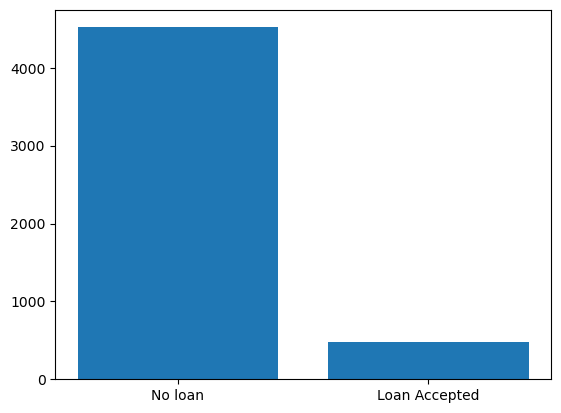

In [4]:
loan_counts = bank['Personal Loan'].value_counts().sort_index()
x = loan_counts.index
y = loan_counts.values

plt.bar(x, y)
plt.xticks([0, 1], ['No loan', 'Loan Accepted'])

4. Prepare X and y

In [5]:
y = bank['Personal Loan']
X = bank.drop(['Personal Loan', 'ID', 'ZIP Code'], axis = 1)

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Securities Account  5000 non-null   int64  
 8   CD Account          5000 non-null   int64  
 9   Online              5000 non-null   int64  
 10  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 429.8 KB


5. Split training and test datasets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


6. Fit a decision tree.<br>
We set the max depth to be 3 to stop the tree growing.

In [8]:
dec_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

7. Plot the tree and print the classification results.<br>
Calculate the accuracy rate and confusion matrix.

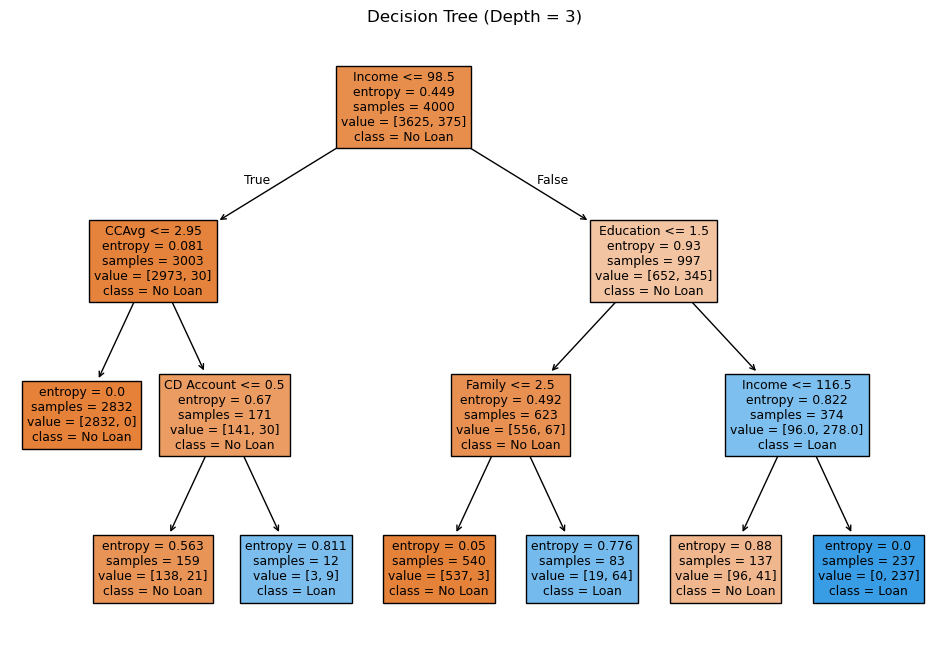

In [9]:
plt.figure(figsize=(12, 8))
plot_tree(dec_tree, feature_names=X_train.columns, class_names=['No Loan', 'Loan'], filled=True)
plt.title("Decision Tree (Depth = 3)")
plt.show()

In [10]:
print(export_text(dec_tree, feature_names=X_train.columns, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2832.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD Account <= 0.50
|   |   |   |--- weights: [138.00, 21.00] class: 0
|   |   |--- CD Account >  0.50
|   |   |   |--- weights: [3.00, 9.00] class: 1
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [537.00, 3.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [19.00, 64.00] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- weights: [96.00, 41.00] class: 0
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 237.00] class: 1



In [11]:
# Predict on test data
y_pred = dec_tree.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.986
Confusion Matrix:
 [[894   1]
 [ 13  92]]


8. Next we fit a tree without specifying stopping criteria.<br>
By default, the tree will grown until there is no more information gain.<br>
Repeat Step 7 for this tree.

In [12]:
new_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
new_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

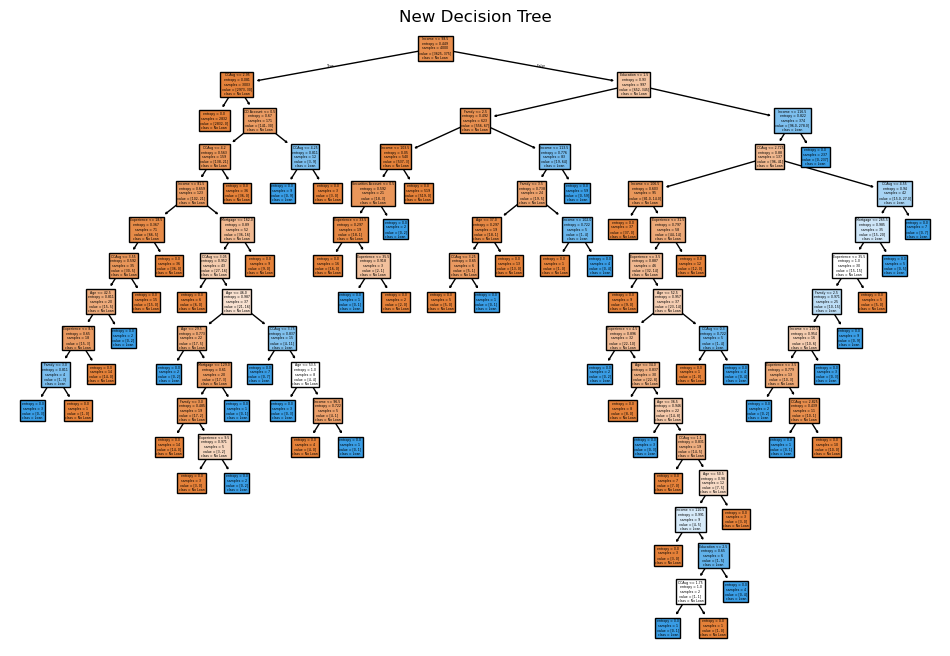

In [13]:
plt.figure(figsize=(12, 8))
plot_tree(new_tree, feature_names=X_train.columns, class_names=['No Loan', 'Loan'], filled=True)
plt.title("New Decision Tree")
plt.show()

In [14]:
# Predict on test data
y_pred = new_tree.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.984
Confusion Matrix:
 [[887   8]
 [  8  97]]


9. Bagging, random forest and boosting. Repeat Step 7 for all methods.

9.1 Bagging

9.2 Random forest

In [15]:
random_forest = RandomForestClassifier(n_estimators=300, criterion='entropy', max_features=4, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=4, n_estimators=300,
                       random_state=42)

In [16]:
# Prediction
rf_pred = random_forest.predict(X_test)

9.3 Plot the importance of each variable based on the random forest results.

9.4 Boosting. Try manipulate the three parameters to generate three boosting trees. Compare the results.